In [308]:
!pip install opencv-python
!pip install PyQt5

     ---------------------------------------- 6.7/6.7 MB 1.7 MB/s eta 0:00:00
     ---------------------------------------- 50.1/50.1 MB 2.6 MB/s eta 0:00:00
     -------------------------------------- 77.7/77.7 kB 865.1 kB/s eta 0:00:00


In [263]:
import pandas as pds
import numpy as np
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D
from turtle import *


In [264]:
def pretty_table(data, cell_sep=' | ', header_separator=True) -> str:
    rows = len(data)
    cols = len(data[0])

    col_width = []
    for col in range(cols):
        columns = [str(data[row][col]) for row in range(rows)]
        col_width.append(len(max(columns, key=len)))

    separator = "-+-".join('-' * n for n in col_width)

    lines = []

    for i, row in enumerate(range(rows)):
        result = []
        for col in range(cols):
            item = str(data[row][col]).rjust(col_width[col])
            result.append(item)

        lines.append(cell_sep.join(result))

        if i == 0 and header_separator:
            lines.append(separator)

    return '\n'.join(lines)

def radar_factory(num_vars, frame='circle'):
    """

    """
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarAxes(PolarAxes):

        name = 'radar'

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            if x[0] != x[-1]:
                x = np.concatenate((x, [x[0]]))
                y = np.concatenate((y, [y[0]]))
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars, radius=0.5, edgecolor="k")
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)

        def draw(self, renderer):
            if frame == 'polygon':
                gridlines = self.yaxis.get_gridlines()
                for gl in gridlines:
                    gl.get_path()._interpolation_steps = num_vars
            super().draw(renderer)

        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))

                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)
                return {'polar': spine}
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta

class opt:
    '''
    Данный класс содержит следующие функции:
    for_two_criteria - функция свертки для двух основных критерий.
        в параметры задаются значения: 
            а1 (пока что), по умолчанию там значения от 1 до 0 с шагом 0.1
            criteria - номера столбцов критериев, по умолчанию там стоят первые два столбца
    for_all - свертка для всех критериев
        в параметры задаются значения:
            relevance - значения для каждого критерия
        '''


    def __init__(self, data='opt.csv', max_min = [0,1,0,0,0,0,0,0]):
        self.data = pds.read_csv(data, decimal=',', sep=';')
        self.max_min = max_min
        self.name_list = self.data.columns.tolist()

    
    def hello(self):
        left(90)
        pensize(10)
        penup()
        forward(100)
        pendown()
        pencolor("red")
        begin_fill()
        circle(70,230)
        pensize(10)
        pencolor("red")

        pencolor("red",)
        forward(140)
        seth(40)
        forward(135)
        pencolor("red")
        right(5)
        circle(70,210)
        pencolor("black")

        seth(30)
        fillcolor("red")
        end_fill()
        seth(-90)
        pencolor("red")
        pensize(3)
        forward(50)
        pencolor("black")


        hideturtle()
        done()
        
        img = plt.imread('opt.jpg')
        plt.imshow(img)
        plt.show()
    
    def example(self):
        data = [
            ["название предмета оптимизации", "Критерий 1"],
            {"Предмет 1": 0, "Предмет 2": 0, "Предмет 3": 0}
        ]
        rows = [
            data[0]
        ]
        rows += [(k, v) for k, v in data[1].items()]
        print(pretty_table(rows))
        
    def criteria_names(self):
        df = self.data.copy()
        criteria_names = df.columns.tolist()
        criteria_names.pop(0)
        k = 1
        for i in criteria_names:
            print('Критерий №{}:{} '.format(k,i))
            k+=1
        return()
        
    def for_two_criteria(self, a1=[i/10 for i in range(10, -1, -1)], criteria = [1,2]):
            
        max_min=[]
        for i in criteria:
            for x in range(len(self.max_min)):
                if i == x+1:
                    max_min.append(self.max_min[x])
        
        a2 = [1 - i for i in a1]
        df = self.data.copy()
        names = df.iloc[:,0].tolist()
        criteria_names = df.columns.tolist()
        a,b=df.shape[0],df.shape[1]
        x1 = df.iloc[:,criteria[0]].tolist()
        x2 = df.iloc[:,criteria[1]].tolist()
        
        main_list = []
        
        for e in range(len(x1)):
            inner_list = []
            for i in range(len(a1)):
                if max_min[0] == 0 and max_min[1] == 0:
                    inner_list.append(a1[i]*x1[e] + a2[i]*x2[e])
                elif max_min[0] == 0 and max_min[1] == 1:
                    inner_list.append(a1[i]*x1[e] - a2[i]*x2[e])
                elif max_min[0] == 1 and max_min[1] == 0:
                    inner_list.append(-(a1[i]*x1[e]) + a2[i]*x2[e])
                elif max_min[0] == 1 and max_min[1] == 1:
                    inner_list.append(-(a1[i]*x1[e]) - a2[i]*x2[e])

            main_list.append(inner_list)
        df1 = pds.DataFrame(main_list)
        max_df = df1.max(axis=0)    
        df1.loc[a] = max_df
        
        text = print('Датафрейм, полученный после сверстки введенных данны:\n', df1)
        
        return(max_min)

    def for_all(self, relevance = [8,-6,7,2,3,5,9,4]):

        df = self.data.copy()
        main_list = []
        a,b=df.shape[0],df.shape[1]
       
        criteria_names = df.columns.tolist()
        criteria_names.pop(0)
        
        k = 1
        while k<=b-1: 
            main_list.append(df.iloc[:,k].tolist())
            k+=1
            
        df_main_list = pds.DataFrame(main_list)
        df_main_list = df_main_list.T
        t = 0
        diagramm_list = []
        while t<=b+1: 
            diagramm_list.append(df_main_list.iloc[t].tolist())
            t+=1
            
        df_values = pds.DataFrame(main_list)
        df_values = df_values.T
        min_values = df_values.min(axis=0).tolist()
        
        count_list = []
        for i in min_values:
            count_list.append(len(str(i)))
        
        normalized_list=[]
        for en, i in enumerate(count_list):
            normalized_list.append((relevance[en]/sum(relevance))/10**(i-1))

        criteria_names = df.columns.tolist()
        criteria_names.pop(0)
        collapse_list = []
        for i in range(len(df.iloc[:,1:])):
            collapse_list.append(df.iloc[i].tolist())
            
        for i in collapse_list:
            i.pop(0)
        
        multiply_list = []
        for i in collapse_list:
            inner_list=[]
            for en, e in enumerate(i):
                inner_list.append(e*normalized_list[en])
            multiply_list.append(inner_list)
        
        final_list = []
        for i in multiply_list:
            final_list.append(sum(i))
        df_rel = pds.DataFrame(final_list)
        text = print('Результаты сверстки по введенным данным:\n', df_rel)

        data = [criteria_names,
                ('ЛЕПЕСТКОВАЯ ДИАГРАММА', diagramm_list
                )]

        N = len(data[0])
        theta = radar_factory(N, frame='polygon')                                     # polygon  !!!

        spoke_labels = data.pop(0)
        title, case_data = data[0]
        fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(projection='radar'))
        fig.subplots_adjust(top=0.85, bottom=0.05)
        ax.set_title(title,  position=(0.5, 1.1), ha='center')

        for d in case_data:
            line = ax.plot(theta, d)
            ax.fill(theta, d,  alpha=0.25)
        ax.set_varlabels(spoke_labels)

        plt.show()
        
        return()
    
    def ideal_dot(self, koef =1.1):
        max_min = self.max_min

        df = self.data.copy()
        a,b=df.shape[0],df.shape[1]
        max_df = df.max(axis=0)
       
        criteria_names = df.columns.tolist()
        criteria_names.pop(0)
        
        k = 1
        main_list = []
        while k<=b-1: 
            main_list.append(df.iloc[:,k].tolist())
            k+=1
            
        max_list=[]
        for en, i in enumerate(main_list):
            for x in range(len(max_min)):
                if en == x and max_min[en]==0:
                    max_list.append(max(i)*1.1)
                elif en == x and max_min[en]==1:
                    max_list.append(1)#(min(i)*0.9)
        sub_list = []
        s = 1
        while s<=b-1: 
            for en, el in enumerate(main_list):
                for i in range(len(max_min)):
                    if en == i and max_min[en]==0:
                        inner_list = list(df.iloc[:,s].map(lambda x: (max_list[i]-x)/max_list[i]))
                        sub_list.append(inner_list)
                    elif en == i and max_min[en]==1:
                        inner_list = list(df.iloc[:,s].map(lambda x: (1/((x-max_list[i])/max_list[i]))))
                        sub_list.append(inner_list)
                s+=1
                
                
        df_sub = pds.DataFrame(sub_list)
        df_sub = df_sub.T
        
        t = 0
        diagramm_list = []
        while t<=b+1: 
            diagramm_list.append(df_sub.iloc[t].tolist())
            t+=1
            
        square_list = []
        o = 0
        while o<=a-1: 
            inner_list = list(df_sub.iloc[o].map(lambda x: x**2))
            square_list.append(inner_list)
            o+=1
        df_square = pds.DataFrame(square_list)
        sum_df = df_square.sum(axis=1)    

        data = [criteria_names,
                ('ЛЕПЕСТКОВАЯ ДИАГРАММА', diagramm_list
                )]

        N = len(data[0])
        theta = radar_factory(N, frame='polygon')                                     # polygon  !!!

        spoke_labels = data.pop(0)
        title, case_data = data[0]
        fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(projection='radar'))
        fig.subplots_adjust(top=0.85, bottom=0.05)
        ax.set_rgrids([0, 1, 2.0, 3.0, 4.0, 5.0, 6])
        ax.set_title(title,  position=(0.5, 1.1), ha='center')

        for d in case_data:
            line = ax.plot(theta, d)
            ax.fill(theta, d,  alpha=0.25)
        ax.set_varlabels(spoke_labels)

        plt.show()
        
        text = ('Расстояние каждого предмета: ', sum_df)

        return(text)
        
    def benchmark(self, benchmark_list = [5,10,20,15,20,5,6,3]):        
        max_min = self.max_min
        df = self.data.copy()
        a,b=df.shape[0],df.shape[1]
        criteria_names = df.columns.tolist()
        criteria_names.pop(0)

        k = 1
        main_list = []
        while k<=b-1: 
            main_list.append(df.iloc[:,k].tolist())
            k+=1

        control_list = []
        s = 1
        while s<=b-1: 
            for en, el in enumerate(main_list):
                for i in range(len(max_min)):
                    if en == i and max_min[en]==0:
                        inner_list = list(df.iloc[:,s].map(lambda x: (x/benchmark_list[i])))
                        control_list.append(inner_list)
                    elif en == i and max_min[en]==1:
                        inner_list = list(df.iloc[:,s].map(lambda x: (1/(x/benchmark_list[i]))))
                        control_list.append(inner_list)
                s+=1
                
        df_control = pds.DataFrame(control_list)
        df_control = df_control.T
        
        k = 0
        filter_list = []
        while k<=b+1: 
            filter_list.append(df_control.iloc[k].tolist())
            k+=1
                
        df_filter = pds.DataFrame(filter_list)
                
        final_list=[]
        for i in filter_list:
            if min(i) <= 1:
                final_list.append('NA')
            elif min(i) >= 1:
                final_list.append(min(i))
        
        max_list = [i for i in final_list if type(i) == float]

        data = [criteria_names,
                ('ЛЕПЕСТКОВАЯ ДИАГРАММА', filter_list
                )]

        N = len(data[0])
        theta = radar_factory(N, frame='polygon')                                     # polygon  !!!

        spoke_labels = data.pop(0)
        title, case_data = data[0]
        fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(projection='radar'))
        fig.subplots_adjust(top=0.85, bottom=0.05)
        ax.set_title(title,  position=(0.5, 1.1), ha='center')

        for d in case_data:
            line = ax.plot(theta, d)
            ax.fill(theta, d,  alpha=0.25)
        ax.set_varlabels(spoke_labels)

        plt.show()
        
        print('Полученные предметы прошедшие контрольные показатели', pds.DataFrame(final_list))
        
        return()
o = opt()

Вас приветствует программа по оптимизации!



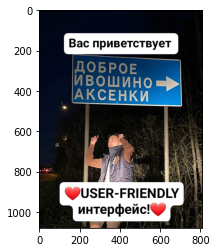

ВАЖНО! Формат файла должен выглядеть так:

название предмета оптимизации | Критерий 1
------------------------------+-----------
                    Предмет 1 |          0
                    Предмет 2 |          0
                    Предмет 3 |          0
Введите название CSV-файла в формате "name.csv", дорогой пользователь:

opt.csv

Номера ваших критериев:

Критерий №1:Полезность дисцпилины 
Критерий №2:Сложность дисциплины 
Критерий №3:Часы семинских занятий 
Критерий №4:Часы лекционных занятий 
Критерий №5:Часы самостоятельной работы 
Критерий №6:Количество практико-ориентированных работ 
Критерий №7:Актуальность 
Критерий №8:Количество теоретических работ 

Какую программу вы хотите запустить?
    1) Линейная свертка для двух основных критериев
    2) Линейная свертка для все критериев
    3) Метод идеальной точки
    4) Метод контрольных показателей
2

Введите значимость для критериев в соответствие с номером критерия (через запятую):


Значимости критериев (через запятую):
8,-

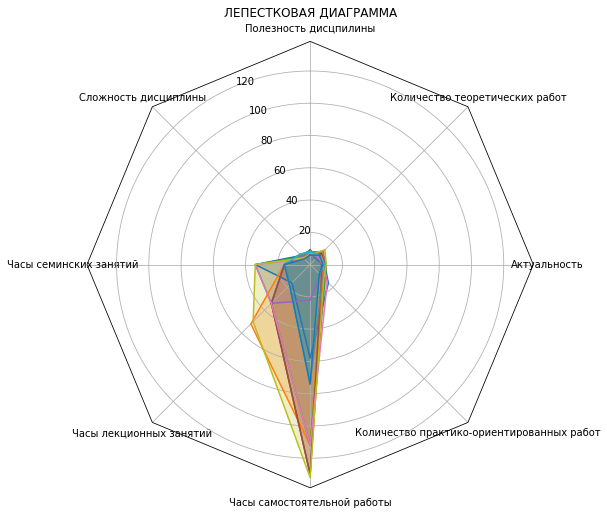

In [262]:
print('Вас приветствует программа по оптимизации!\n')
try:
    o.hello()
except Terminator:
    pass
print('ВАЖНО! Формат файла должен выглядеть так:\n')
o.example()
file = input('''Введите название CSV-файла в формате "name.csv", дорогой пользователь:\n\n''')

try:
    o = opt(data=file)
except FileNotFoundError:
    print('Вы указали неверный путь к файлу!')

print('\nНомера ваших критериев:\n')
o.criteria_names()
    
programm_num = int(input('''
Какую программу вы хотите запустить?
    1) Линейная свертка для двух основных критериев
    2) Линейная свертка для все критериев
    3) Метод идеальной точки
    4) Метод контрольных показателей\n'''))
if programm_num == 1:
    print('Выберите критерии для свертки:\n\n', )
    crit_num = input('Номера критериев (через запятую):\n')
    x = crit_num.split(',',2)
    crit_list = [int(i) for i in x]
    o.for_two_criteria(criteria=crit_list)
elif programm_num ==2:
    print('\nВведите значимость для критериев в соответствие с номером критерия (через запятую):\n\n')
    rel = input('Значимости критериев (через запятую):\n')
    x = rel.split(',')
    rel_list = [int(i) for i in x]
    o.for_all(relevance=rel_list)
elif programm_num==3:
    print('\nВведите максимизировать или минимизировать (0 - максимизация, 1 - минимизация):\n')
    max_min_list=[]
    for i in range(len(o.name_list)-1):
        print('Для критерия №{}'.format(i+1))
        max_min_list.append(int(input()))
    o = opt(data=file,max_min=max_min_list)
    o.ideal_dot()
    print(max_min_list)
elif programm_num==4:
    print('\nВведите контрольные показатели для каждого критерия:\n')
    benchmark_lst=[]
    for i in range(len(o.name_list)-1):
        print('Для критерия №{}'.format(i+1))
        benchmark_lst.append(int(input()))
    o.benchmark(benchmark_list=benchmark_lst)
    